In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1337)

In [15]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [17]:
x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0],784)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [18]:
# create model
model = Sequential()
model.add(Dense(784, input_shape=(784,), activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Fit the model
Model = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.4239 - acc: 0.8852 - val_loss: 0.2665 - val_acc: 0.9216
Epoch 2/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.2447 - acc: 0.9288 - val_loss: 0.2119 - val_acc: 0.9390
Epoch 3/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.1901 - acc: 0.9448 - val_loss: 0.1686 - val_acc: 0.9493
Epoch 4/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.1507 - acc: 0.9562 - val_loss: 0.1395 - val_acc: 0.9572
Epoch 5/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.1213 - acc: 0.9647 - val_loss: 0.1229 - val_acc: 0.9621
Epoch 6/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0996 - acc: 0.9711 - val_loss: 0.1052 - val_acc: 0.9673
Epoch 7/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0819 - acc: 0.9766 - val_loss: 0.0

Total loss: 0.0653483230987
Accuracy of the test datset: 98.02


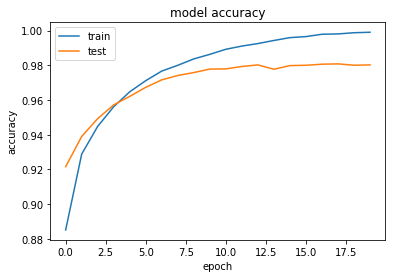

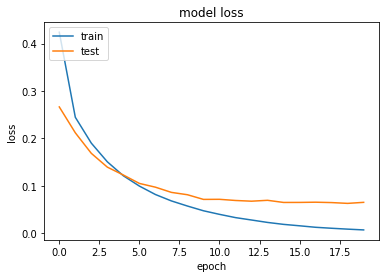

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Total loss:', score[0])
print('Accuracy of the test datset:', score[1]*100)

plt.plot(Model.history['acc'])
plt.plot(Model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()